In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
DATASET_PATH = "C:/Users/aishu/Downloads/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['fashion-dataset', 'images', 'images.csv', 'styles', 'styles - Copy.csv', 'styles.csv']


In [3]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=7103, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

C:\Users\aishu\AppData\Local\Temp\ipykernel_19672\994668768.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=7103, error_bad_lines=False)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,image
0,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,NaN,53759.jpg
1,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,NaN,1855.jpg
2,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,NaN,26960.jpg
3,37812,Men,Apparel,Topwear,Shirts,Navy Blue,Summer,2012,Formal,John Players Men Navy Blue Shirt,NaN,37812.jpg
4,56825,Men,Apparel,Topwear,Shirts,Brown,Summer,2012,Casual,John Players Men Brown Shirt,NaN,56825.jpg
5,3954,Women,Apparel,Topwear,Tshirts,Pink,Summer,2011,Casual,Jealous 21 Women's Pink T-shirt,NaN,3954.jpg
6,28690,Women,Apparel,Topwear,Kurtas,Beige,Summer,2012,Ethnic,W Women Printed Beige Kurta,NaN,28690.jpg
7,45856,Women,Apparel,Topwear,Kurtas,Brown,Summer,2012,Ethnic,Vishudh Women Brown Kurta,NaN,45856.jpg
8,5891,Men,Apparel,Topwear,Tshirts,Black,Summer,2011,Casual,Puma Men's Stripe Polo Black T-shirt,NaN,5891.jpg
9,38630,Women,Apparel,Topwear,Tshirts,Purple,Summer,2012,Casual,Nike Women Purple Polo T-shirt,NaN,38630.jpg


In [4]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    '''Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    '''

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

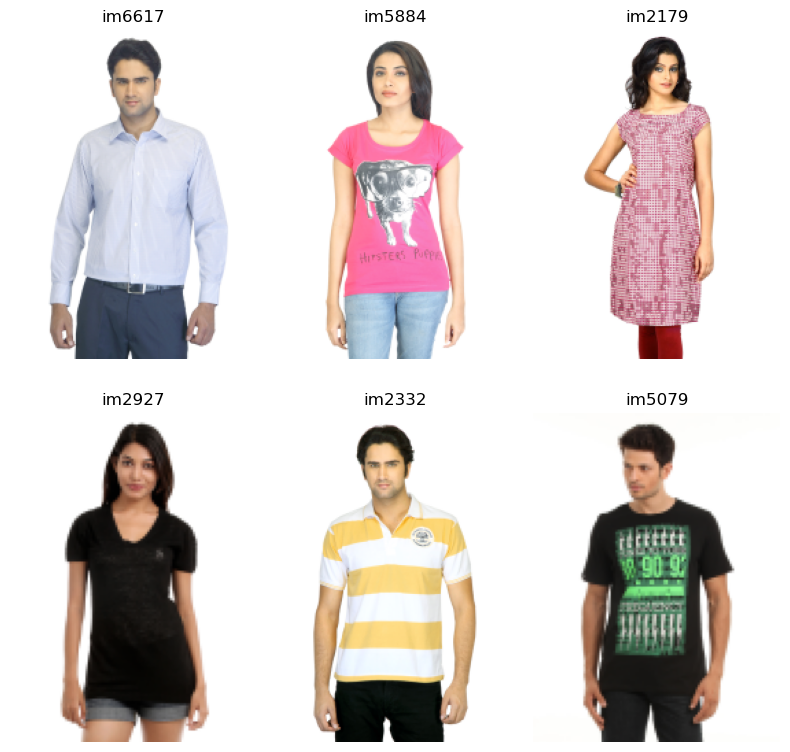

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

<AxesSubplot:>

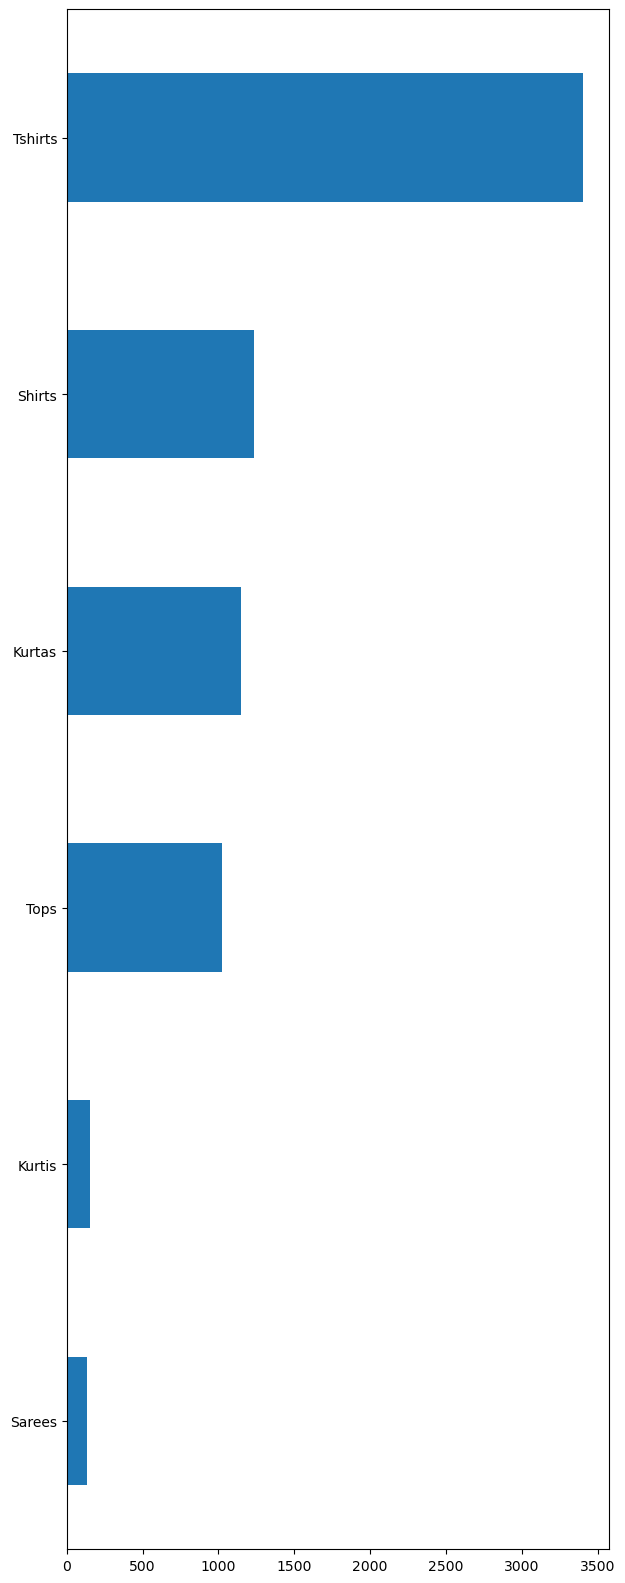

In [6]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [7]:
import tensorflow as tf
import keras
from keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
import keras.utils as image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

'2.11.0'

In [8]:
# Input Shape
import h5py as h5py
img_width, img_height, _ = 224, 224, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [10]:
emb = get_embedding(model, df.iloc[0].image)
print(emb.size)
emb.shape

1/1 [==============================] - 1s 829ms/step
2048


(2048,)

(144, 108, 3)
[ 0.24595952 17.383432    0.49382246 ...  1.9396982   0.
 11.485401  ]


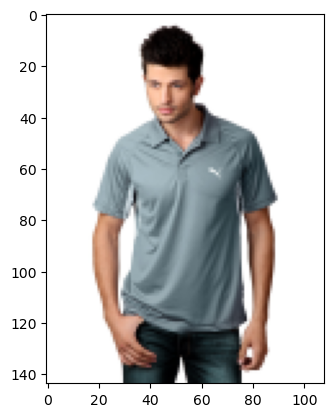

In [11]:
img_array = load_image(df.iloc[0].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [12]:
df.shape

(7102, 12)

In [13]:
%%time
#import swifter

# Parallel apply
df_sample      = df#.sample(10)
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 131ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 166ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 217ms/step


1/1 [==============================] - 0s 224ms/step


1/1 [==============================] - 0s 246ms/step


1/1 [==============================] - 0s 272ms/step


1/1 [==============================] - 0s 321ms/step


1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 277ms/step


1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 302ms/step


1/1 [==============================] - 0s 365ms/step


1/1 [==============================] - 0s 377ms/step


1/1 [==============================] - 0s 383ms/step


1/1 [==============================] - 0s 382ms/step


1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 423ms/step


1/1 [==============================] - 0s 431ms/step


1/1 [==============================] - 1s 501ms/step


1/1 [==============================] - 0s 481ms/step


1/1 [==============================] - 0s 496ms/step
(7102, 2048)
Wall time: 33min 51s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.245960,17.383432,0.493822,3.374466,2.567370,0.0,6.482541,5.862635,0.000000,3.164868,...,4.464023,0.447085,1.448141,12.884136,0.000000,0.39749,5.028078,1.939698,0.000000,11.485401
1,0.028540,18.567101,0.000000,0.757248,1.504951,0.0,1.982045,2.963786,1.072765,4.539296,...,3.247078,4.273135,3.088644,16.997044,0.000000,0.00000,2.258092,1.595796,0.000000,7.674056
2,1.153967,3.894161,0.118729,4.157022,0.000000,0.0,1.296955,1.380126,1.428335,3.396735,...,4.892044,4.481520,3.961409,17.455626,0.000000,0.00000,2.673179,2.615766,0.000000,7.662078
3,1.853292,15.912104,0.986797,0.632939,0.000000,0.0,4.031827,16.873169,0.000000,2.837469,...,6.853226,4.058545,2.966084,14.836216,0.044706,0.00000,1.804817,1.866990,1.837200,16.279070
4,3.996910,5.097955,0.000000,1.234978,1.493351,0.0,4.177033,7.642929,3.091055,5.459331,...,3.718688,0.000000,1.349444,27.745436,3.333408,0.00000,5.588656,3.619971,0.448948,4.441558


In [14]:
import pickle
with open('fashion.pkl', 'wb') as f:  # open a text file
    pickle.dump(df_embs, f) # serialize the list

In [15]:
with open('fashion.pkl', 'rb') as f:
    fashion_embed = pickle.load(f) # deserialize using load()

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(fashion_embed, metric='cosine')
cosine_sim[:4, :4]

array([[0.9999996 , 0.79839426, 0.7804365 , 0.84619606],
       [0.79839426, 0.99999976, 0.74317175, 0.81692904],
       [0.7804365 , 0.74317175, 0.9999996 , 0.7744801 ],
       [0.84619606, 0.81692904, 0.7744801 , 0.99999994]], dtype=float32)

In [38]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

[(0, 0.518201), (1, 0.56983346), (2, 0.52053356), (3, 0.525197), (4, 0.51080257), (5, 0.59387267), (6, 0.5347368), (7, 0.5454711), (8, 0.62793064), (9, 0.5865224), (10, 0.5935334), (11, 0.5653075), (12, 0.57294214), (13, 0.5445461), (14, 0.55462795), (15, 0.5663501), (16, 0.603656), (17, 0.5742094), (18, 0.5732753), (19, 0.5208843), (20, 0.5057339), (21, 0.4888543), (22, 0.58859086), (23, 0.5571327), (24, 0.5155311), (25, 0.5699551), (26, 0.5690738), (27, 0.55206805), (28, 0.54066247), (29, 0.5710354), (30, 0.52434146), (31, 0.55167544), (32, 0.5319963), (33, 0.57415915), (34, 0.51252806), (35, 0.5319141), (36, 0.536883), (37, 0.55350894), (38, 0.590231), (39, 0.5481646), (40, 0.56111854), (41, 0.5373938), (42, 0.5467017), (43, 0.54967934), (44, 0.49779272), (45, 0.52132326), (46, 0.5167387), (47, 0.61536413), (48, 0.56660074), (49, 0.60102224), (50, 0.57140183), (51, 0.57740194), (52, 0.5042345), (53, 0.5455256), (54, 0.562938), (55, 0.5588608), (56, 0.5935334), (57, 0.53997976), (58,

(Int64Index([3458, 3385, 3007, 2915, 7024], dtype='int64'),
 [0.99754757, 0.7693207, 0.7672459, 0.72889376, 0.7209848])

hi
[(0, 0.9999996), (1, 0.79839426), (2, 0.7804365), (3, 0.84619606), (4, 0.78706646), (5, 0.739329), (6, 0.6737827), (7, 0.6765479), (8, 0.7546365), (9, 0.5961156), (10, 0.6183301), (11, 0.74390745), (12, 0.8094241), (13, 0.7319533), (14, 0.7245261), (15, 0.73692137), (16, 0.6921237), (17, 0.72756684), (18, 0.7371458), (19, 0.82276386), (20, 0.78656477), (21, 0.76031154), (22, 0.6065252), (23, 0.7067799), (24, 0.79667616), (25, 0.69721884), (26, 0.70594084), (27, 0.7402351), (28, 0.80387014), (29, 0.7805402), (30, 0.77358395), (31, 0.7296857), (32, 0.7380216), (33, 0.684582), (34, 0.8054579), (35, 0.79160905), (36, 0.8229128), (37, 0.7386755), (38, 0.7188704), (39, 0.8107234), (40, 0.71828276), (41, 0.7740382), (42, 0.8031899), (43, 0.6596947), (44, 0.7717637), (45, 0.7990094), (46, 0.7790314), (47, 0.7940744), (48, 0.7389919), (49, 0.6882225), (50, 0.8042575), (51, 0.8070094), (52, 0.807366), (53, 0.65699345), (54, 0.7168032), (55, 0.60490024), (56, 0.6183301), (57, 0.8110635), (58, 

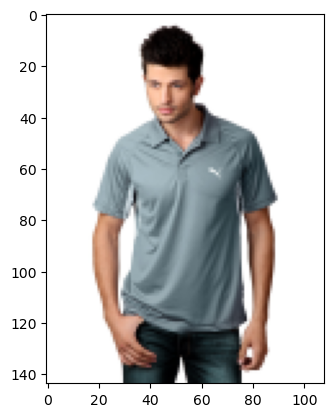

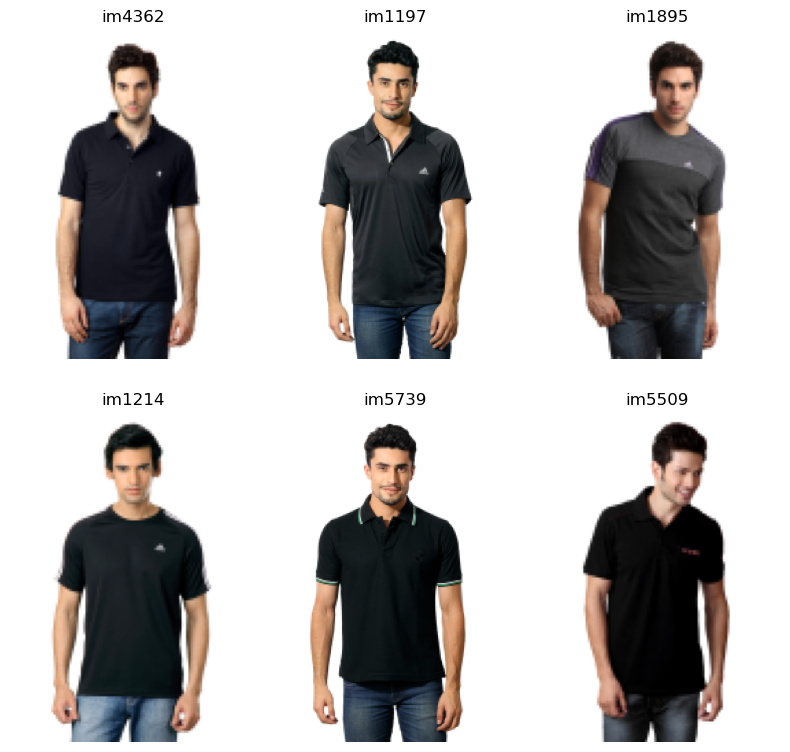

In [39]:
# Idx Item to Recommender
idx_ref = 0
print("hi")
# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

226


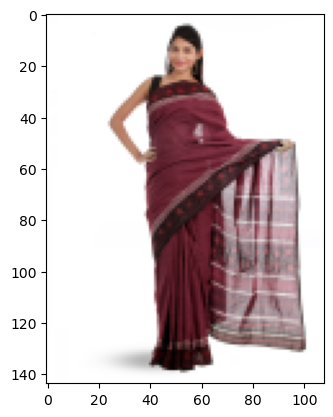

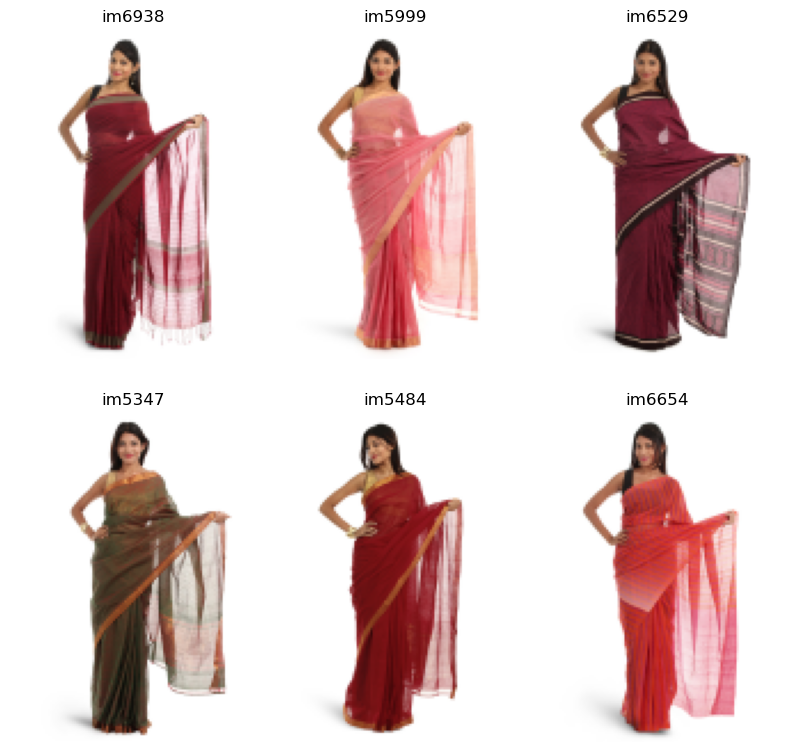

In [26]:
idx_ref = 226

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

987


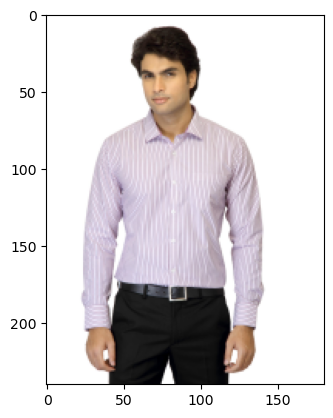

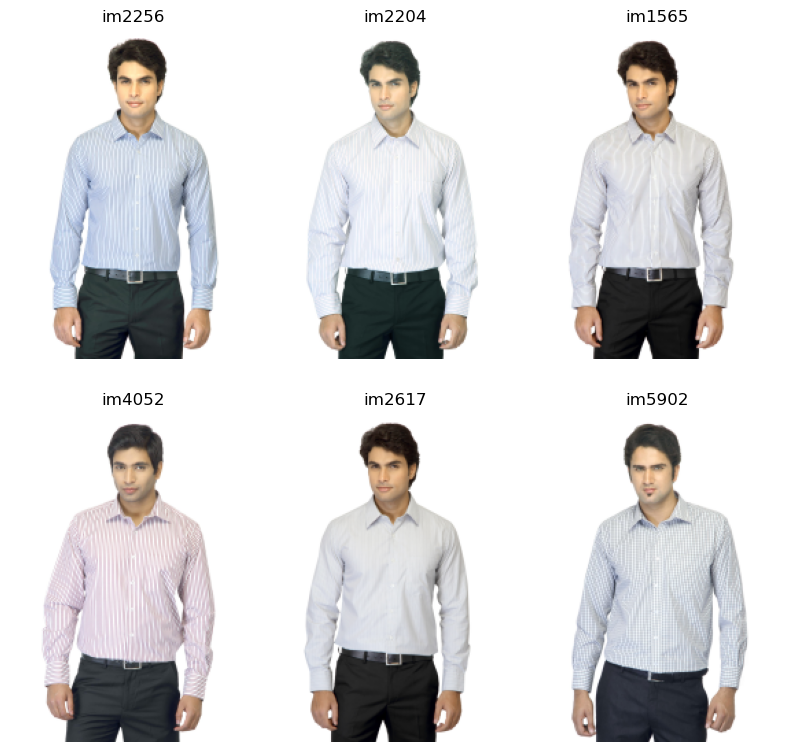

In [21]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)